In [49]:
import pandas as pd
from scipy import stats
Data=pd.read_excel('./C题数据.xlsx')

In [50]:
###分析是否有显著差异
A=Data[Data['插层率（%）'].isnull()]
B=Data[Data['插层率（%）'].notnull()]
A=A.fillna(0)
Col1=Data.columns[2:]
for i in Col1:
    stat, p = stats.ttest_ind(A[i], B[i])
    print(i,p)#P值小于0.05，拒绝原假设，认为两组数据有显著差异


厚度mm 1.3807949239324745e-10
孔隙率（%） 6.498992242504649e-10
压缩回弹性率（%） 0.0010865937984880724
过滤阻力Pa 0.20964447933205474
过滤效率（%） 0.02645720171870658
透气性 mm/s 0.22526448377131109
插层率（%） 2.9250439679243913e-13


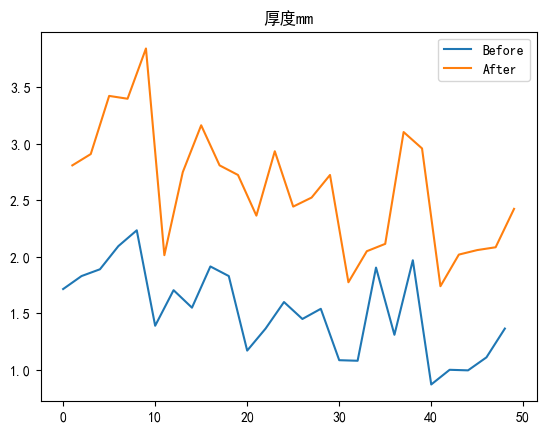

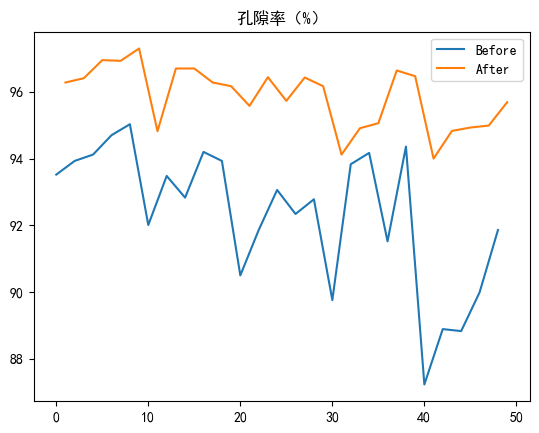

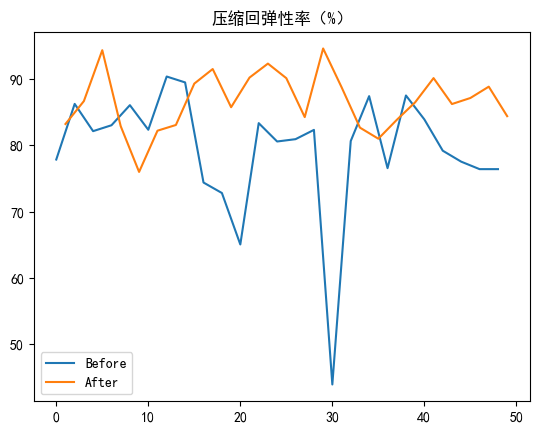

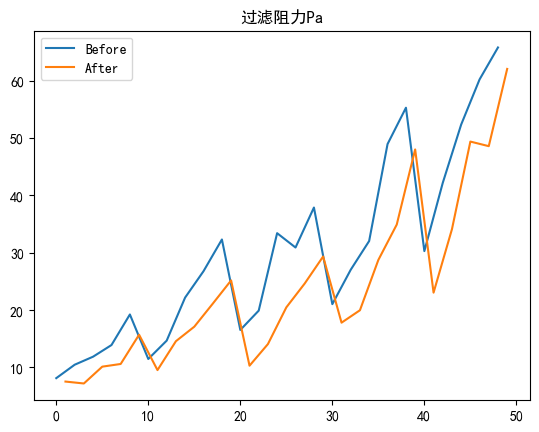

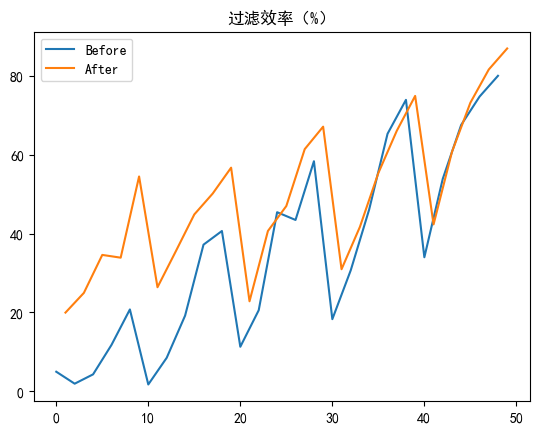

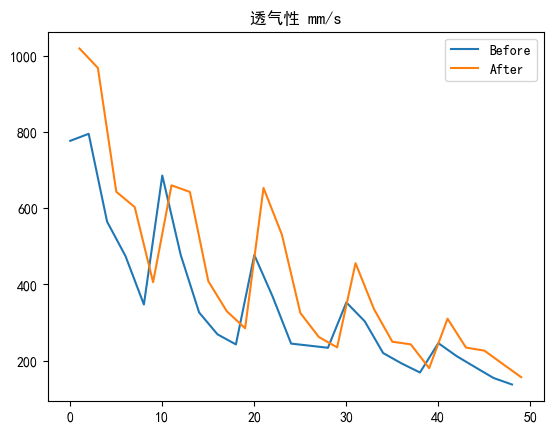

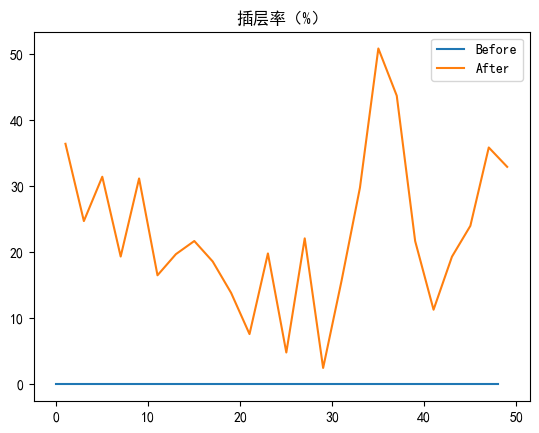

In [51]:
###利用PCA降维后计算分布
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
for i in Col1:
    plt.plot(A[i],label='Before')
    plt.plot(B[i],label='After')
    plt.title(i)
    plt.legend()
    plt.show()

[[ 1.          0.23856567 -0.11212063 -0.1399491   0.31574795  0.25506577
   0.05300024]
 [ 0.23856567  1.          0.35840844 -0.26943629 -0.29644631  0.01410676
  -0.21579691]
 [-0.11212063  0.35840844  1.         -0.17031367 -0.30358481  0.10817772
  -0.35989043]
 [-0.1399491  -0.26943629 -0.17031367  1.          0.65454802  0.3548557
   0.12583969]
 [ 0.31574795 -0.29644631 -0.30358481  0.65454802  1.          0.31024609
   0.01042117]
 [ 0.25506577  0.01410676  0.10817772  0.3548557   0.31024609  1.
  -0.0271193 ]
 [ 0.05300024 -0.21579691 -0.35989043  0.12583969  0.01042117 -0.0271193
   1.        ]]


d:\new_1\envs\new_conda1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


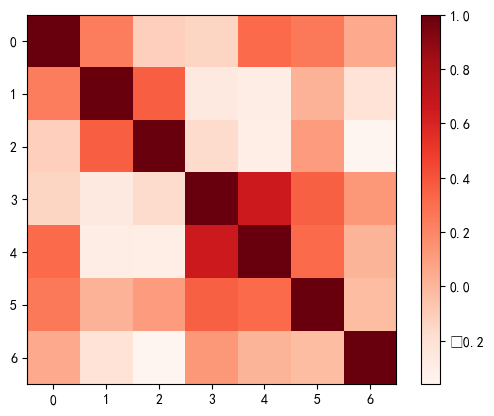

In [55]:
###计算差异并做出相关性分析
import numpy as np
Y=B['插层率（%）']
sampler1A=A[Col1[:]]
sampler1B=B[Col1[:]]
# print(sampler1A,sampler1B)
chayi=np.array(sampler1B)-np.array(sampler1A)
print(np.corrcoef(chayi,rowvar=0))
plt.imshow(np.corrcoef(chayi,rowvar=0),cmap=plt.cm.Reds)
plt.colorbar()